<h1><center><font size="6">Real Estate Market Data Estimate </font></center></h1>

# Analyse de la forme des données:

In [148]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn import metrics
from matplotlib import rcParams
from sklearn import preprocessing

%matplotlib inline

In [149]:
df =pd.read_csv("Datafinal.csv")

In [150]:
#visualiser notre base des données
df.head()

,Unnamed: 0,Unnamed: 0.1,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,...,fonds,plein_air,salle_de_bain,constructible,service,chauffage,climatisation,cuisine,installations_sportives,description
0,839,839,1350000.0,150.0,150.0,NaN,ZAGHOUAN,LA MARSA,Ain Zaghouan,ain zaghouan nord,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fb.72 contacter notre conseiller en immobilier...
1,9909,9909,840000.0,150.0,150.0,NaN,ZAGHOUAN,LA MARSA,NaN,"Ain Zaghouan, La Marsa, Tunis",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10757,10757,850000.0,450.0,450.0,NaN,ZAGHOUAN,NaN,NaN,"El Fahs, Zaghouan",...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25407,25407,946000.0,150.0,150.0,NaN,ZAGHOUAN,NaN,NaN,"jardin de carthage, Aïn Zaghouan, Tunis",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31229,31229,650000.0,150.0,150.0,NaN,ZAGHOUAN,NaN,NaN,"Zaghouan, Zaghouan",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df.shape

(14121, 23)

In [152]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'price', 'superficie_habitable',
       'superficie_terrain', 'codeP', 'gouvernorat', 'delegation', 'localite',
       'adresse', 'anneeConst', 'nbpiece', 'typeImm', 'fonds', 'plein_air',
       'salle_de_bain', 'constructible', 'service', 'chauffage',
       'climatisation', 'cuisine', 'installations_sportives', 'description'],
      dtype='object')

In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14121.0,1.501405e+04,9.842745e+03,0.0,5799.0,14742.0,23419.0,3.368900e+04
Unnamed: 0.1,14121.0,1.501405e+04,9.842745e+03,0.0,5799.0,14742.0,23419.0,3.368900e+04
price,14121.0,7.082580e+10,8.415255e+12,140.0,205000.0,350000.0,700000.0,1.000000e+15
superficie_habitable,14121.0,2.580834e+02,3.912397e+03,0.0,150.0,150.0,150.0,4.200000e+05
superficie_terrain,14121.0,2.580834e+02,3.912397e+03,0.0,150.0,150.0,150.0,4.200000e+05
codeP,1794.0,4.234100e+03,2.273015e+03,0.0,2074.0,4054.0,5060.0,2.550000e+04
nbpiece,14121.0,1.114369e+00,1.936095e+00,0.0,0.0,0.0,2.0,9.000000e+00
plein_air,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chauffage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14121 entries, 0 to 14120
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               14121 non-null  int64  
 1   Unnamed: 0.1             14121 non-null  int64  
 2   price                    14121 non-null  float64
 3   superficie_habitable     14121 non-null  float64
 4   superficie_terrain       14121 non-null  float64
 5   codeP                    1794 non-null   float64
 6   gouvernorat              14121 non-null  object 
 7   delegation               10468 non-null  object 
 8   localite                 4224 non-null   object 
 9   adresse                  13168 non-null  object 
 10  anneeConst               80 non-null     object 
 11  nbpiece                  14121 non-null  int64  
 12  typeImm                  14121 non-null  object 
 13  fonds                    626 non-null    object 
 14  plein_air             

In [155]:
#pour voir le taux de valeurs manquantes pour chaque variable
missing_rate =df.isna().sum()/df.shape[0]
missing_rate

Unnamed: 0                 0.000000
Unnamed: 0.1               0.000000
price                      0.000000
superficie_habitable       0.000000
superficie_terrain         0.000000
codeP                      0.872955
gouvernorat                0.000000
delegation                 0.258693
localite                   0.700871
adresse                    0.067488
anneeConst                 0.994335
nbpiece                    0.000000
typeImm                    0.000000
fonds                      0.955669
plein_air                  1.000000
salle_de_bain              0.701650
constructible              0.991148
service                    1.000000
chauffage                  1.000000
climatisation              1.000000
cuisine                    1.000000
installations_sportives    1.000000
description                0.621344
dtype: float64

In [156]:
Data =df.copy()

### Corriger la colonne CodeP

In [167]:
import json
with open('CodesP_data.json') as json_data:
    data_dict = json.load(json_data)
    print(data_dict[0]['Gouvernorat'],len(data_dict))


ARIANA 4869


In [168]:
def changer1():  
    l=[]
    for i in range(len(data_dict)):
        Gouvernorat= (data_dict[i]['Gouvernorat'])
        l.append(Gouvernorat)
    return l

In [169]:
   l2=[]
   for i in range(len(data_dict)):
      Delegation= (data_dict[i]['Delegation'])
      l2.append(Delegation)     

In [170]:
   l3=[]
   for i in range(len(data_dict)):
      Localite= (data_dict[i]['Localite'])
      l3.append(Localite)

In [171]:
   l4=[]
   for i in range(len(data_dict)):
      CodePostal= (data_dict[i]['Code Postal'])
      l4.append(CodePostal)

In [172]:
def convert_to_data():
    
 data_tot = pd.DataFrame({'Gouvernorat': l,'Delegation':l2,'Localite':l3,'Code Postal':l4})
 return(data_tot)

In [173]:
data2=convert_to_data()

In [174]:
data2

,Gouvernorat,Delegation,Localite,Code Postal
0,ARIANA,RAOUED,BOU HNECH,2081
1,ARIANA,RAOUED,CITE CHAKER,2081
2,ARIANA,RAOUED,CITE DE LA MOSQUE,2081
3,ARIANA,RAOUED,CITE EL MOUAOUIET,2081
4,ARIANA,RAOUED,CITE EL MOUNTAZEH,2081
...,...,...,...,...
4864,ZAGHOUAN,SAOUEF,SIDI DGHIM,1115
4865,ZAGHOUAN,SAOUEF,SIDI FARJALLAH,1115
4866,ZAGHOUAN,SAOUEF,SIDI MANSOUR,1115
4867,ZAGHOUAN,SAOUEF,ZAGTOUN,1115


In [175]:
def corCodeP():
    liste=[]
    liste2= []
    liste3=[]
    dataF=pd.DataFrame()
    for i in range(len(Data)):
        for j in range(len(data2)):
            if(Data['localite'][i]==data2["Localite"][j] ):             
                liste.append(data2['Code Postal'][j])
                liste2.append(data2['Localite'][j] )
                liste3.append(data2['Delegation'][j])
    dataF= pd.DataFrame({'Localite':liste2,'Code Postal':liste,'Delegation':liste3})

    return dataF 

In [176]:
corCodeP()

,Localite,Code Postal,Delegation
0,BORJ LOUZIR,2073,LA SOUKRA
1,CITE ENNASR,2083,RAOUED
2,CITE ENNASR,2094,MNIHLA
3,CITE ENNASR,2065,EZZAHRA
4,CITE ENNASR,1145,MOHAMADIA
...,...,...,...
4265,BERGE DU LAC,1053,LA MARSA
4266,MUTUELLE VILLE,1082,EL MENZAH
4267,MUTUELLE VILLE,1082,EL MENZAH
4268,KHAZNADAR,2017,LE BARDO


In [177]:
def changer():
    newData=corCodeP()
    for i in range(len(Data)):
        for j in range(len(newData)):
            if(Data['localite'][i]==newData['Localite'][j]) and (Data['delegation'][i]==newData['Delegation'][j]):
                 Data['codeP'][i]=newData['Code Postal'][j]
    return Data

In [178]:
d=changer()

C:\Users\msi\AppData\Local\Temp/ipykernel_7548/167176153.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['codeP'][i]=newData['Code Postal'][j]


In [179]:
#pour voir le taux de valeurs manquantes pour chaque variable
def missing():
    missing_rate =d.isna().sum()/d.shape[0]
    return missing_rate

In [180]:
missing()

Unnamed: 0                 0.000000
Unnamed: 0.1               0.000000
price                      0.000000
superficie_habitable       0.000000
superficie_terrain         0.000000
codeP                      0.867219
gouvernorat                0.000000
delegation                 0.258693
localite                   0.700871
adresse                    0.067488
anneeConst                 0.994335
nbpiece                    0.000000
typeImm                    0.000000
fonds                      0.955669
plein_air                  1.000000
salle_de_bain              0.701650
constructible              0.991148
service                    1.000000
chauffage                  1.000000
climatisation              1.000000
cuisine                    1.000000
installations_sportives    1.000000
description                0.621344
dtype: float64

### Correction de prix (meme interval)

In [181]:
def corrigerPrix():
    
    conditionPrix=d[(d.price>=1000000)].index
    for i in conditionPrix:
        if (d['price'][i] > 1000000000) and (d['price'][i]< 1000000000000):
          d['price'][i]=d['price'][i]/1000000
        if (d['price'][i] >= 1000000) and (d['price'][i] < 1000000000):
          d['price'][i]=d['price'][i]/1000
        if d['price'][i] >= 1000000000000:
          d['price'][i]=d['price'][i]/1000000000 
    return d

In [182]:
def CorrigerPrix2():
    condition2=d[(d.price>10000)].index
    for i in condition2:  
        d['price'][i]=d['price'][i]/10
        return d

<AxesSubplot:>

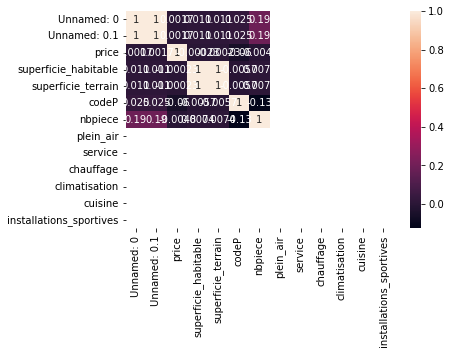

In [183]:
sns.heatmap(d.corr(),annot=True)

In [234]:
# suppression des colonnes non importants
def supp2():
    liste=['service','chauffage','climatisation','cuisine','installations_sportives',
           'plein_air','Unnamed: 0','Unnamed: 0.1','anneeConst','fonds','constructible']
    for i in liste:
         del d[i]

# Preprocessing

In [235]:
#Encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
def transformerlabelencoder():
    labelencoder_X=LabelEncoder()
    liste=['gouvernorat','delegation','localite','adresse','typeImm','superficie_habitable','description',
           'superficie_terrain','price','salle_de_bain','codeP']
    for i in liste :
        d[i]=labelencoder_X.fit_transform(d[i]) 
    return d.info()

In [187]:
d.head()

,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,nbpiece,typeImm,salle_de_bain,description
0,1127,138,138,146,23,85,2,1989,0,1,10,2751
1,983,138,138,146,23,85,354,298,0,1,10,4476
2,986,353,353,146,23,144,354,703,0,1,5,4476
3,1026,138,138,146,23,144,354,3037,0,1,10,4476
4,869,138,138,146,23,144,354,1892,0,1,10,4476


In [188]:
# supprimer les valeurs dupliquées
def suppdupliquer():
    d.drop_duplicates(keep='first' , inplace = True)
    return d.shape

In [189]:
suppdupliquer()

(12619, 12)

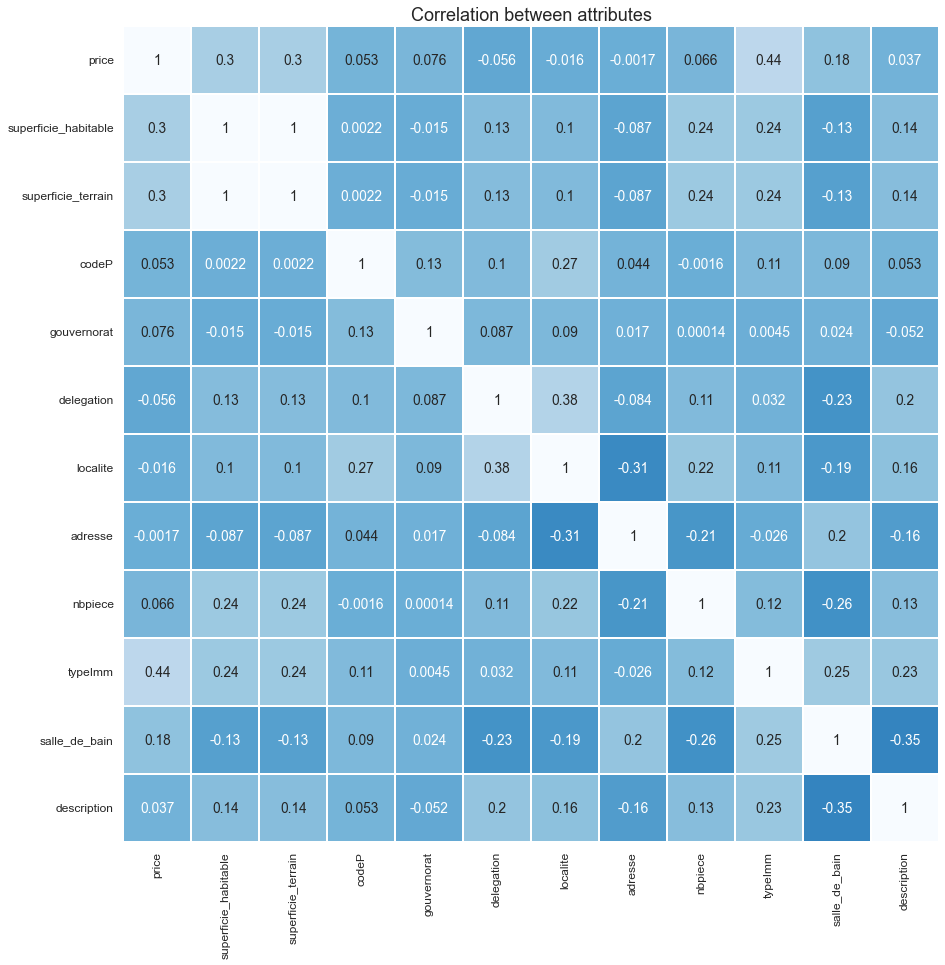

In [190]:
# correlation plot---heatmap
cor=d.corr()
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,cmap='Blues_r', annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=12)

In [191]:
def transformerMean(champs):
    mean_value=d[champs].mean()
    d[champs].fillna(value=mean_value, inplace=True) 

In [192]:
transformerMean('salle_de_bain')

In [193]:
transformerMean('nbpiece')

In [194]:
Data2 = d.fillna(0)

## outliers

In [195]:
def afficher1():
    fig=plt.figure(figsize=(10,7))
    axes=fig.add_axes([0,0,0.8,0.8])
    dist=sns.distplot(Data2["superficie_terrain"],color="orange")
    axes.ticklabel_format(style="plain",axis="x")

C:\Users\msi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


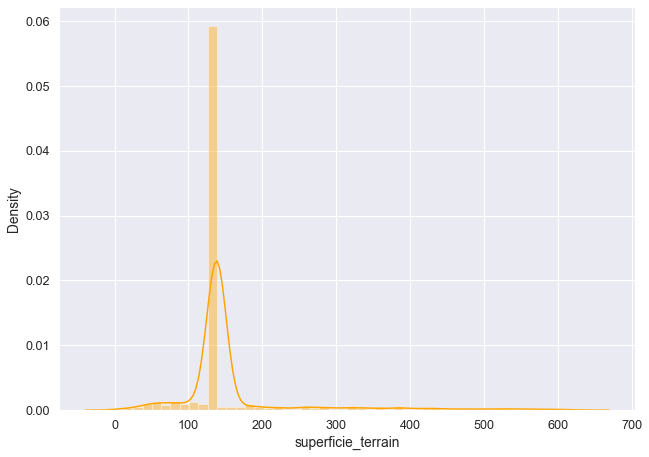

In [196]:
afficher1()

In [197]:
Data2[Data2["superficie_terrain"]<30]

,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,nbpiece,typeImm,salle_de_bain,description
427,815,8,8,146,0,86,354,2371,0,2,10,4476
964,292,6,6,30,0,1,48,774,1,0,10,4476
1044,137,21,21,30,0,1,48,694,2,0,0,4476
1489,967,17,17,30,0,1,48,694,0,0,3,4476
1618,816,5,5,30,0,1,48,3,0,0,3,4476
...,...,...,...,...,...,...,...,...,...,...,...,...
13138,158,14,14,146,22,85,354,1138,2,0,0,4476
13280,986,19,19,146,22,84,354,1113,0,0,5,4476
13383,900,13,13,146,22,144,354,6,0,0,0,4476
13476,869,19,19,146,22,144,354,514,0,0,3,4476


In [198]:
Data2.drop((Data2[Data2["superficie_terrain"]<30]).index,inplace=True)
Data2

,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,nbpiece,typeImm,salle_de_bain,description
0,1127,138,138,146,23,85,2,1989,0,1,10,2751
1,983,138,138,146,23,85,354,298,0,1,10,4476
2,986,353,353,146,23,144,354,703,0,1,5,4476
3,1026,138,138,146,23,144,354,3037,0,1,10,4476
4,869,138,138,146,23,144,354,1892,0,1,10,4476
...,...,...,...,...,...,...,...,...,...,...,...,...
14116,271,138,138,16,23,144,354,4258,0,0,0,791
14117,606,138,138,35,23,85,354,3042,4,0,5,50
14118,224,138,138,35,23,85,354,3066,2,0,0,3781
14119,1405,138,138,34,23,85,354,1394,0,0,10,976


In [199]:
Data2[Data2["superficie_terrain"]>500]

,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,nbpiece,typeImm,salle_de_bain,description
176,1263,595,595,146,0,86,354,1683,8,2,6,4476
187,837,588,588,29,0,86,45,540,0,2,3,4476
204,1174,503,503,146,0,86,354,1760,0,2,7,4476
210,1133,539,539,42,0,86,12,137,0,2,10,4476
228,1199,541,541,146,0,32,354,1275,6,2,5,4476
...,...,...,...,...,...,...,...,...,...,...,...,...
13762,1227,551,551,146,22,144,354,1234,0,3,2,2398
13880,1027,552,552,146,22,144,354,153,0,1,10,199
13882,1156,564,564,146,22,144,354,472,0,1,10,985
13883,1303,626,626,146,22,144,354,4258,0,1,10,190


In [200]:
Data2.drop((Data2[Data2["superficie_terrain"]>500]).index,inplace=True)
Data2

,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,nbpiece,typeImm,salle_de_bain,description
0,1127,138,138,146,23,85,2,1989,0,1,10,2751
1,983,138,138,146,23,85,354,298,0,1,10,4476
2,986,353,353,146,23,144,354,703,0,1,5,4476
3,1026,138,138,146,23,144,354,3037,0,1,10,4476
4,869,138,138,146,23,144,354,1892,0,1,10,4476
...,...,...,...,...,...,...,...,...,...,...,...,...
14116,271,138,138,16,23,144,354,4258,0,0,0,791
14117,606,138,138,35,23,85,354,3042,4,0,5,50
14118,224,138,138,35,23,85,354,3066,2,0,0,3781
14119,1405,138,138,34,23,85,354,1394,0,0,10,976


In [201]:
def afficher2():
    fig=plt.figure(figsize=(10,7))
    axes=fig.add_axes([0,0,0.8,0.8])
    dist=sns.distplot(Data2["nbpiece"],color="orange")
    axes.ticklabel_format(style="plain",axis="x")

C:\Users\msi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


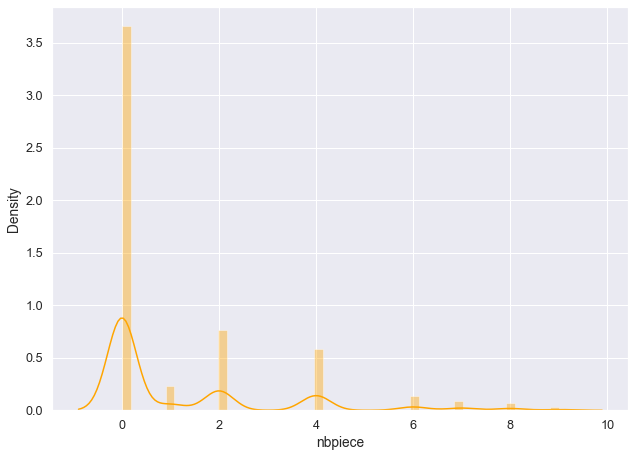

In [202]:
 afficher2()

In [203]:
Data2[Data2["nbpiece"]>7]

,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,nbpiece,typeImm,salle_de_bain,description
163,820,197,197,146,0,118,354,273,8,2,6,4476
169,1158,386,386,146,0,144,354,329,9,2,7,4476
173,1027,386,386,146,0,144,354,1491,9,2,7,4476
200,1100,138,138,146,0,32,354,729,8,2,10,4476
211,1140,467,467,146,0,32,354,1195,8,2,5,4476
...,...,...,...,...,...,...,...,...,...,...,...,...
12288,986,138,138,146,22,85,354,1142,8,2,10,4476
12311,1184,386,386,146,22,144,354,997,8,2,10,4476
12320,1100,354,354,146,22,144,354,3550,9,2,6,4476
12369,919,138,138,8,22,144,354,4258,8,2,6,835


In [204]:
Data2.drop((Data2[Data2["nbpiece"]>8]).index,inplace=True)
Data2

,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,nbpiece,typeImm,salle_de_bain,description
0,1127,138,138,146,23,85,2,1989,0,1,10,2751
1,983,138,138,146,23,85,354,298,0,1,10,4476
2,986,353,353,146,23,144,354,703,0,1,5,4476
3,1026,138,138,146,23,144,354,3037,0,1,10,4476
4,869,138,138,146,23,144,354,1892,0,1,10,4476
...,...,...,...,...,...,...,...,...,...,...,...,...
14116,271,138,138,16,23,144,354,4258,0,0,0,791
14117,606,138,138,35,23,85,354,3042,4,0,5,50
14118,224,138,138,35,23,85,354,3066,2,0,0,3781
14119,1405,138,138,34,23,85,354,1394,0,0,10,976


# Modeling

### Les metriques d'un algorithme de regression
$$ R2 =1- \frac{\sum  (y_{vrai} - y_{pred} )^2}{\sum  (y_{vrai} - \overline{ y_{vrai}} )^2}  $$
$$ MAE = \frac{1}{m} \sum \lvert y_{vrai} - y_{pred} \rvert $$
$$ MSE = \frac{1}{m} \sum  (y_{vrai} - y_{pred} )^2 $$
$$ RMSE = \sqrt {\frac{1}{m} \sum  (y_{vrai} - y_{pred} )^2 }$$
$$MedianAE =median{\lvert y_{vrai} - y_{pred} \rvert} $$

In [205]:
# division entre les variables et le label
x = Data2.loc[:,Data2.columns!='price']
y = Data2.loc[:,Data2.columns=='price']

## Normalisation des données avec RobustScaler

In [206]:
from sklearn.preprocessing import MinMaxScaler
roscaler = MinMaxScaler()
X = pd.DataFrame(roscaler.fit_transform(x),columns=x.columns)
X

,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,nbpiece,typeImm,salle_de_bain,description
0,0.229787,0.229787,1.000000,1.0,0.590278,0.00565,0.467121,0.00,0.333333,1.0,0.614611
1,0.229787,0.229787,1.000000,1.0,0.590278,1.00000,0.069986,0.00,0.333333,1.0,1.000000
2,0.687234,0.687234,1.000000,1.0,1.000000,1.00000,0.165101,0.00,0.333333,0.5,1.000000
3,0.229787,0.229787,1.000000,1.0,1.000000,1.00000,0.713246,0.00,0.333333,1.0,1.000000
4,0.229787,0.229787,1.000000,1.0,1.000000,1.00000,0.444340,0.00,0.333333,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
12208,0.229787,0.229787,0.109589,1.0,1.000000,1.00000,1.000000,0.00,0.000000,0.0,0.176720
12209,0.229787,0.229787,0.239726,1.0,0.590278,1.00000,0.714420,0.50,0.000000,0.5,0.011171
12210,0.229787,0.229787,0.239726,1.0,0.590278,1.00000,0.720056,0.25,0.000000,0.0,0.844727
12211,0.229787,0.229787,0.232877,1.0,0.590278,1.00000,0.327384,0.00,0.000000,1.0,0.218052


In [207]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.20, random_state=42)
print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', y_train.shape, '\nY_test: ', y_test.shape)

X_train:  (9770, 11) 
X_test:  (2443, 11) 
Y_train:  (9770, 1) 
Y_test:  (2443, 1)


## 1) Linear Regression

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train.values.ravel());
predictions=lm.predict(X_test)

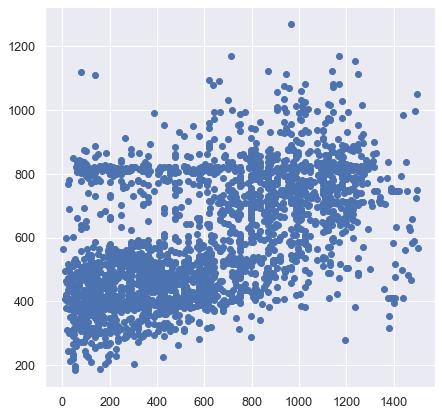

In [287]:
#predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [288]:
print('Intercept = ', lm.intercept_)
#Estimated coefficients for the linear regression problem
print('Coefficients : ',lm.coef_)

Intercept =  328.6571632950528
Coefficients :  [ 4.53378120e+14 -4.53378120e+14  3.09912109e+01  9.62578125e+01
 -7.33281250e+01 -6.96953125e+01 -2.32343750e+01 -2.11875000e+01
  3.33093750e+02  7.37343750e+01 -4.47031250e+01]


In [210]:
def reglinear():
    lm = LinearRegression()
    lm.fit(X_train, y_train.values.ravel());
    predictions=lm.predict(X_test)
    #model evaluation
    MSE = mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    MAE = mean_absolute_error(y_test, predictions)
    R2 =  r2_score(y_test, predictions)
    mod = pd.DataFrame([['LinearRegression  ', MSE,RMSE,MAE, R2]],
                  columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2 '])
    return mod

In [211]:
reglinear()

,Model,MSE,RMSE,MAE,R2
0,LinearRegression,103302.827034,321.407572,258.986343,0.280508


## 2) Boosting Regression

In [212]:
from sklearn.ensemble import GradientBoostingRegressor
boostringModel = GradientBoostingRegressor()
boostringModel.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor()

In [291]:
pred =boostringModel.predict(X_test)

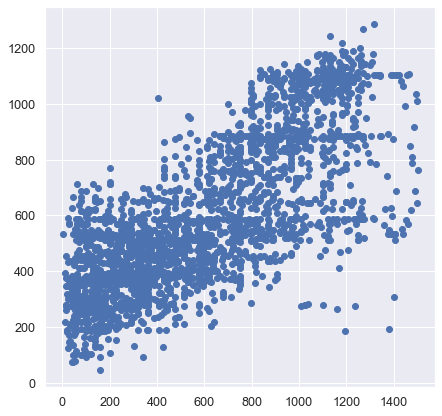

In [292]:
plt.scatter(y_test,pred)

In [215]:
def boostingreg():
    boostringModel = GradientBoostingRegressor()
    boostringModel.fit(X_train, y_train.values.ravel())  
    pred =boostringModel.predict(X_test)
    #model evaluation
    MSE = mean_squared_error(y_test, pred)
    RMSE = np.sqrt(mean_squared_error(y_test, pred))
    MAE = mean_absolute_error(y_test, pred)
    R2 =  r2_score(y_test, pred)
    mo = pd.DataFrame([['Boosting Regression ', MSE,RMSE,MAE, R2]],
                   columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2 '])
    return mo

In [216]:
boostingreg()

,Model,MSE,RMSE,MAE,R2
0,Boosting Regression,63697.576799,252.383789,192.568728,0.556354


## 3) ADABOOST

In [217]:
from sklearn.ensemble import AdaBoostRegressor
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],
}

clf = GridSearchCV(AdaBoostRegressor(random_state=3), parameters, cv=5,scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train.values.ravel())
print("Best parameters:")
print(clf.best_params_)


Best parameters:
{'learning_rate': 0.001, 'n_estimators': 75}


In [295]:
model_adaboost = AdaBoostRegressor(random_state=3, **clf.best_params_)

In [296]:
model_adaboost.fit(X_train, y_train.values.ravel());

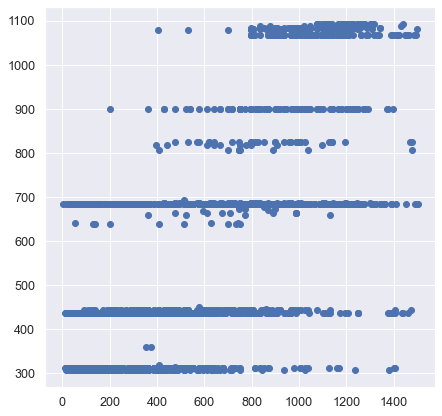

In [298]:
plt.scatter(y_test,y_pred_ada)

In [218]:
def adaregressor():
    parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],}

    clf = GridSearchCV(AdaBoostRegressor(random_state=3), parameters, cv=5,scoring="neg_mean_absolute_error")
    clf.fit(X_train, y_train.values.ravel())  
    model_adaboost = AdaBoostRegressor(random_state=3, **clf.best_params_)
    model_adaboost.fit(X_train, y_train.values.ravel())
    y_pred_ada = model_adaboost.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred_ada)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred_ada))
    MAE = mean_absolute_error(y_test, y_pred_ada)
    R2 =  r2_score(y_test, y_pred_ada)
    model = pd.DataFrame([['AdaBoostRegressor ', MSE,RMSE,MAE, R2]],
                   columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2 '])
    return model

In [219]:
adaregressor()

,Model,MSE,RMSE,MAE,R2
0,AdaBoostRegressor,81024.334413,284.647737,223.601465,0.435675


## 4) XGBOOST

In [220]:
#model implementation and fitting data
import xgboost as xgb
xg_reg = xgb.XGBRegressor(alpha= 250,colsample_bytree = 0.765450549518272,gamma =0.0,learning_rate =0.08213242555789223,max_depth = 8,min_child_weight= 12,n_estimators = 350,subsample = 0.9390733830480894)
xg_reg.fit(X_train,y_train.values.ravel())
y_predXG = xg_reg.predict(X_test)

In [222]:
def xgbregressor():
    xg_reg = xgb.XGBRegressor(alpha= 250,colsample_bytree = 0.765450549518272,gamma =0.0,learning_rate =0.08213242555789223,max_depth = 8,min_child_weight= 12,n_estimators = 350,subsample = 0.9390733830480894)
    xg_reg.fit(X_train,y_train.values.ravel())
    y_predXG = xg_reg.predict(X_test)
    #model evaluation
    MSE = mean_squared_error(y_test, y_predXG)
    RMSE = np.sqrt(mean_squared_error(y_test, y_predXG))
    MAE = mean_absolute_error(y_test, y_predXG)
    R2 =  r2_score(y_test, y_predXG)
    results = pd.DataFrame([['XGBOOST ', MSE,RMSE,MAE, R2]],
                  columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2 '])
    return results

In [223]:
xgbregressor()

,Model,MSE,RMSE,MAE,R2
0,XGBOOST,54328.919868,233.085649,171.27477,0.621605


In [224]:
def importancefeature():
    xgb.plot_importance(xg_reg)
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.tight_layout()
    plt.savefig('XGBoost-Features-Importance.jpg')
    plt.show();

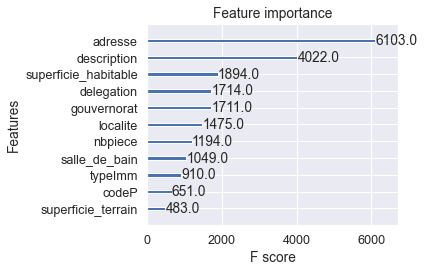

In [225]:
 importancefeature()

## 5) Ridge Regression

In [226]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(Ridge(random_state=10), parameter_space, n_jobs=4,cv=7, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train.values.ravel())
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 1, 'fit_intercept': True, 'solver': 'sag'}


In [303]:
ridge_model = Ridge(random_state=3, **clf.best_params_)

In [304]:
ridge_model.fit(X_train, y_train.values.ravel())

Ridge(alpha=1, random_state=3, solver='sag')

In [228]:
def ridge():
    parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],}

    clf = GridSearchCV(Ridge(random_state=10), parameter_space, n_jobs=4,cv=7, scoring="neg_mean_absolute_error")

    clf.fit(X_train, y_train.values.ravel())
    ridge_model = Ridge(random_state=3, **clf.best_params_)
    ridge_model.fit(X_train, y_train.values.ravel())
    y_pred_ridge = ridge_model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred_ridge)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    MAE = mean_absolute_error(y_test, y_pred_ridge)
    R2 =  r2_score(y_test, y_pred_ridge)
    results = pd.DataFrame([['Ridge Regression ', MSE,RMSE,MAE, R2]],
                    columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2 '])
    return results

In [229]:
ridge()

,Model,MSE,RMSE,MAE,R2
0,Ridge Regression,103265.544407,321.349567,259.156921,0.280768


## 6) Elastic Net:

In [230]:
from sklearn.linear_model import ElasticNet

parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=10), parameter_space, n_jobs=4, cv=5, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train.values.ravel())
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 1, 'fit_intercept': True, 'l1_ratio': 1}


In [307]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)

In [308]:
elasticNet_model.fit(X_train, y_train.values.ravel());

In [232]:
def elsatic():
    parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],}

    clf = GridSearchCV(ElasticNet(random_state=10), parameter_space, n_jobs=4, cv=5, scoring="neg_mean_absolute_error")

    clf.fit(X_train, y_train.values.ravel())
    elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)
    elasticNet_model.fit(X_train, y_train.values.ravel());
    y_pred_elastic = elasticNet_model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred_elastic)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
    MAE = mean_absolute_error(y_test, y_pred_elastic)
    R2 =  r2_score(y_test, y_pred_elastic)
    results = pd.DataFrame([['Elastic Net ', MSE,RMSE,MAE, R2]],
                  columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2 '])
    return results

In [233]:
 elsatic()

,Model,MSE,RMSE,MAE,R2
0,Elastic Net,103604.961375,321.877246,260.516133,0.278404
